In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Data predproccessing

In [2]:
data = pd.read_csv('music_genre.csv')
data = data.dropna()
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


# Сделаем $y_{true}$

In [3]:
y = np.where(data['popularity'] > 50, 1, 0)
y

array([0, 0, 0, ..., 1, 1, 1])

## Уберем лишние столбцы

In [4]:
drop_col=['instance_id', 'obtained_date', 'track_name', 'popularity']
data=data.drop(drop_col, axis=1)
data

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,0.330,Hip-Hop
50001,Roy Woods,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
50002,Berner,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
50003,The-Dream,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop


# Сопоставим строковым значениям числа

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

def MultiColumnLabelEncoder(columns,data):
    X = data.iloc[:].values
    for i in range(len(columns)):
        X[:, columns[i]] = labelencoder.fit_transform(X[:, columns[i]])
    data = pd.DataFrame(X, columns=data.columns, index = data.index)
    return data

In [6]:
columns = [0, 6, 9, 11, 13]
data = MultiColumnLabelEncoder(columns, data)
data

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,5029,0.00468,0.652,-1.0,0.941,0.792,1,0.115,-5.201,1,0.0748,274,0.759,5
1,6117,0.0127,0.622,218293.0,0.89,0.95,5,0.124,-7.043,1,0.03,4193,0.531,5
2,1591,0.00306,0.62,215613.0,0.755,0.0118,11,0.534,-4.617,0,0.0345,8138,0.333,5
3,1707,0.0254,0.774,166875.0,0.7,0.00253,4,0.157,-4.498,0,0.239,8158,0.27,5
4,6519,0.00465,0.638,222369.0,0.587,0.909,9,0.157,-6.266,0,0.0413,13021,0.323,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,492,0.0334,0.913,-1.0,0.574,0.0,4,0.119,-7.022,0,0.298,28848,0.33,6
50001,4980,0.157,0.709,251860.0,0.362,0.0,2,0.109,-9.814,0,0.055,6307,0.113,6
50002,614,0.00597,0.693,189483.0,0.763,0.0,5,0.143,-5.443,0,0.146,9090,0.395,6
50003,6104,0.0831,0.782,262773.0,0.472,0.0,10,0.106,-5.016,1,0.0441,21736,0.354,6


In [7]:
X = data

## Подготовим тренировочные данные

In [8]:
#разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [9]:
X_train

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
39092,5420,0.0146,0.505,276840.0,0.687,0.0218,6,0.189,-5.174,1,0.0288,29393,0.0473,9
30898,1806,0.753,0.304,-1.0,0.309,0.0,11,0.115,-11.466,0,0.0292,10321,0.348,2
45283,6763,0.411,0.787,210862.0,0.586,0.000311,1,0.118,-9.64,0,0.0695,29393,0.581,6
16403,4640,0.00016,0.418,-1.0,0.966,0.00569,10,0.222,-2.656,1,0.213,18123,0.583,0
13658,2053,0.111,0.412,337733.0,0.657,0.000088,9,0.15,-11.78,0,0.0887,8485,0.742,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289,279,0.0717,0.513,265665.0,0.763,0.919,9,0.164,-7.425,1,0.057,29393,0.532,7
44737,308,0.0241,0.276,415920.0,0.726,0.818,4,0.0927,-6.678,1,0.0469,21219,0.272,3
38163,2820,0.458,0.4,109707.0,0.818,0.000003,3,0.132,-11.238,0,0.08,16742,0.936,9
860,5506,0.11,0.523,228706.0,0.904,0.269,11,0.291,-3.038,1,0.608,29393,0.511,5


In [10]:
y.sum()

18900

In [11]:
X_train=X_train.astype('float')
X_test=X_test.astype('float')
y_train = y_train.astype('float')
y_test=y_test.astype('float')

# Knn

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
model_knn = KNeighborsClassifier(
    n_neighbors=1,
    metric='manhattan',
    weights='distance')

model_knn.fit(X_train, y_train)
y_pred=model_knn.predict(X_test)

In [14]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [15]:
knnConfusionMatrix = confusion_matrix(y_test, y_pred)

print('TN FP')
print('FN TP')
print(knnConfusionMatrix)
print(metrics.classification_report(y_test, y_pred))

TN FP
FN TP
[[4147 2093]
 [1844 1916]]
              precision    recall  f1-score   support

         0.0       0.69      0.66      0.68      6240
         1.0       0.48      0.51      0.49      3760

    accuracy                           0.61     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.61      0.61      0.61     10000



In [16]:
lr_auc = roc_auc_score(y_test, y_pred)
print('kNN: ROC AUC=%.3f' % (lr_auc))

kNN: ROC AUC=0.587


# SVM

In [17]:
X_train

,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
39092,5420.0,0.014600,0.505,276840.0,0.687,0.021800,6.0,0.1890,-5.174,1.0,0.0288,29393.0,0.0473,9.0
30898,1806.0,0.753000,0.304,-1.0,0.309,0.000000,11.0,0.1150,-11.466,0.0,0.0292,10321.0,0.3480,2.0
45283,6763.0,0.411000,0.787,210862.0,0.586,0.000311,1.0,0.1180,-9.640,0.0,0.0695,29393.0,0.5810,6.0
16403,4640.0,0.000160,0.418,-1.0,0.966,0.005690,10.0,0.2220,-2.656,1.0,0.2130,18123.0,0.5830,0.0
13658,2053.0,0.111000,0.412,337733.0,0.657,0.000088,9.0,0.1500,-11.780,0.0,0.0887,8485.0,0.7420,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289,279.0,0.071700,0.513,265665.0,0.763,0.919000,9.0,0.1640,-7.425,1.0,0.0570,29393.0,0.5320,7.0
44737,308.0,0.024100,0.276,415920.0,0.726,0.818000,4.0,0.0927,-6.678,1.0,0.0469,21219.0,0.2720,3.0
38163,2820.0,0.458000,0.400,109707.0,0.818,0.000003,3.0,0.1320,-11.238,0.0,0.0800,16742.0,0.9360,9.0
860,5506.0,0.110000,0.523,228706.0,0.904,0.269000,11.0,0.2910,-3.038,1.0,0.6080,29393.0,0.5110,5.0


In [19]:
# Машина опорных векторов SVM
from sklearn import svm
modelSvm = svm.SVC()
modelSvm.fit(X_train, y_train)
yPredSvm = modelSvm.predict(X_test)


0.7684729064039408

In [21]:
print(metrics.classification_report(y_test, yPredSvm))

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77      6240
         1.0       0.00      0.00      0.00      3760

    accuracy                           0.62     10000
   macro avg       0.31      0.50      0.38     10000
weighted avg       0.39      0.62      0.48     10000



C:\Users\sasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
lr_auc = roc_auc_score(y_test, yPredSvm)
print('SVM: ROC AUC=%.3f' % (lr_auc))

# RF

In [22]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(
    random_state=42, 
    n_estimators = 100,# число деревьев
    max_depth = 50 # глубина
)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.90      6240
         1.0       0.89      0.73      0.80      3760

    accuracy                           0.86     10000
   macro avg       0.87      0.84      0.85     10000
weighted avg       0.87      0.86      0.86     10000



Text(0.5, 0, 'Feature')

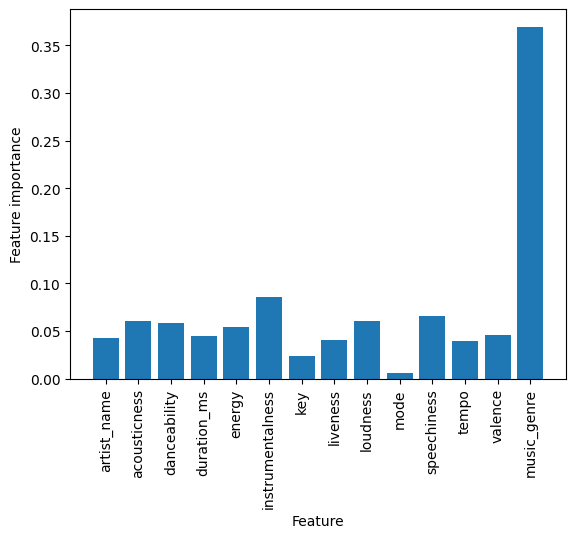

In [23]:
import matplotlib.pyplot as plt

plt.bar(
    x = range(X_train.shape[1]), 
    height = model_rf.feature_importances_
)
plt.xticks(
    ticks = range(X_train.shape[1]), 
    labels = X_train.columns, 
    rotation = 90
)
plt.ylabel('Feature importance')
plt.xlabel('Feature')

In [24]:
lr_auc = roc_auc_score(y_test, y_pred)
print('RandomForest: ROC AUC=%.3f' % (lr_auc))

RandomForest: ROC AUC=0.837
